- reads data from the sheets combines them considering the closes wavelegnth to achieve bigger dataset for training purpose which is required later and then it is split to train and validation (90% to 10%)

Note: the tensrflow and cudnn warnings are normal you can safely disregard them if they show up

In [1]:
from utils.hscp import *

HSPC_predictor = HSPC("data/Challenge Dataset.xlsx")

2024-03-03 20:20:02.014457: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 20:20:02.014501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 20:20:02.016355: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 20:20:02.027281: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-03 20:20:03.242507: W tensorflow/compiler/tf2

data loaded and combined consisting of 517 observations and 161 features


selects the wavelegnths then computes and preprocesses the abosrbance by normalization, smoothing, outlier removal and pca
Note: two types of outlier removal was tested per sample accross the scan ids and comprehensive outlier removal accross all data the latter gives better results in training and valdaiton phase of the regression model
Note: further tuning is required to improve the results in validation test with all above preprocessing modules

In [2]:
HSPC_predictor.select_wavelegnth_range((1400,2400))
HSPC_predictor.compute_and_preprocess_absorbance(smooth_data=True,normalize_data=True,overall_outlier_removal=True,apply_pca=True)

number of wavelegnths falling into range:122
outlier_samples are
       Sample ID  ScanIndex
0   TSTSMPL11-B          1
4   TSTSMPL11-B          5
0   TSTSMPL13-A          1
1   TSTSMPL13-A          2
2   TSTSMPL13-A          3
..          ...        ...
1   TSTSMPL37-B          2
3   TSTSMPL37-B          4
6   TSTSMPL37-B          7
7   TSTSMPL37-B          8
9   TSTSMPL37-B         10

[113 rows x 2 columns]
dimension of features are reduced to 64 componnents
absorbance dataset create consisting of 357 observations and 66 features


,Sample ID,ScanIndex,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,TSTSMPL11-A,1,5.720882,-5.800297,-2.986893,0.115850,0.324600,-0.189192,0.413364,0.024187,...,0.003213,0.000869,0.001007,0.002378,0.002610,0.007058,0.003185,0.000647,-0.004007,-0.000267
1,TSTSMPL11-A,2,-0.074950,-4.181446,-2.072205,-0.519632,1.333220,-0.318056,0.266234,-0.053012,...,0.000885,-0.001154,-0.001166,-0.002995,0.001964,0.000852,0.006266,0.001772,0.001503,0.000182
2,TSTSMPL11-A,3,7.231722,1.848461,-3.542511,-1.683917,0.460560,0.158258,-0.156668,-0.143435,...,-0.003945,0.002921,0.000665,-0.001558,-0.004278,0.001583,-0.000858,-0.001991,0.000718,-0.002928
3,TSTSMPL11-A,4,4.713857,0.896984,-3.868426,-1.626249,0.651039,0.216646,0.084476,-0.187409,...,0.001478,-0.000501,-0.002738,-0.000467,-0.001489,0.005232,0.000961,0.001835,-0.000325,0.001463
4,TSTSMPL11-A,5,1.725778,-2.472573,-2.384342,-0.708020,0.836430,-0.798365,0.272847,0.295005,...,0.002948,0.003755,-0.002816,0.004585,-0.002322,-0.006186,-0.002079,0.000198,-0.003406,0.000788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,TSTSMPL38-A,6,-4.107252,-1.013516,4.570717,-2.197505,1.366267,-0.481179,-0.510086,0.374062,...,0.003667,-0.009435,0.003539,-0.001598,-0.003532,-0.000151,-0.002307,0.001892,0.002135,-0.004889
353,TSTSMPL38-A,7,-4.137365,-6.645438,4.192693,-0.657574,0.935111,-0.403220,-0.018110,-0.085963,...,-0.001347,-0.005648,-0.004793,0.001655,-0.001777,0.002919,0.000473,0.000733,0.000308,-0.000327
354,TSTSMPL38-A,8,-7.041351,-8.235637,5.019091,-0.713874,1.717747,0.264848,0.158096,-0.164850,...,0.000851,-0.001019,0.000184,-0.002313,-0.003665,0.001806,0.000336,-0.002845,0.000922,-0.000552
355,TSTSMPL38-A,9,-2.755446,-5.223724,4.729458,-1.377127,1.247568,-0.687222,-0.476841,0.452386,...,-0.004136,0.005741,0.007397,-0.001244,-0.005664,0.002569,0.000157,0.000040,-0.000509,0.003264


creates and cleans the dataframe with and without meta data

note: using meta data results in a better results in regression model (for the sake of test only the only absorbace was used too)

note: batch normlization is applied in regression to improve the training stability and speed up convergence by reducing internal covariate shift between meta data and absorbance 

In [12]:
HSPC_predictor.build_training_dataset()

training dataset with only absorbance data shape: (357, 64)
training dataset including absorbance data shape: (357, 75)


- builds a regression model with a fully connected deep naural network including batch normalization to  reduce internal covariate shift between meta data and absorbance and also it uses dropout and regularization to mitigate the impact of noisy data 
- the performace result per epoch are depicted in the figures below it shows how the loss and error reduces
Note: The network is moderately tuned given the task's time constraint but basically requires furhter tuning and comprehsive ablation study to achive the best results 

Note: the tensrflow and cudnn warnings are normal you can safely disregard them if they show up

Epoch 1/60
21/21 [==============================] - 2s 13ms/step - loss: 1.1288 - mae: 0.2358 - val_loss: 0.9720 - val_mae: 0.1512
Epoch 2/60
21/21 [==============================] - 0s 6ms/step - loss: 0.9813 - mae: 0.2150 - val_loss: 0.8385 - val_mae: 0.1335
Epoch 3/60
21/21 [==============================] - 0s 6ms/step - loss: 0.8621 - mae: 0.2023 - val_loss: 0.7511 - val_mae: 0.1424
Epoch 4/60
21/21 [==============================] - 0s 6ms/step - loss: 0.7701 - mae: 0.1992 - val_loss: 0.6967 - val_mae: 0.1683
Epoch 5/60
21/21 [==============================] - 0s 7ms/step - loss: 0.6902 - mae: 0.1935 - val_loss: 0.6394 - val_mae: 0.1785
Epoch 6/60
21/21 [==============================] - 0s 7ms/step - loss: 0.6236 - mae: 0.1891 - val_loss: 0.5920 - val_mae: 0.1874
Epoch 7/60
21/21 [==============================] - 0s 7ms/step - loss: 0.5738 - mae: 0.1913 - val_loss: 0.5518 - val_mae: 0.1943
Epoch 8/60
21/21 [==============================] - 0s 6ms/step - loss: 0.5221 - mae: 0.1

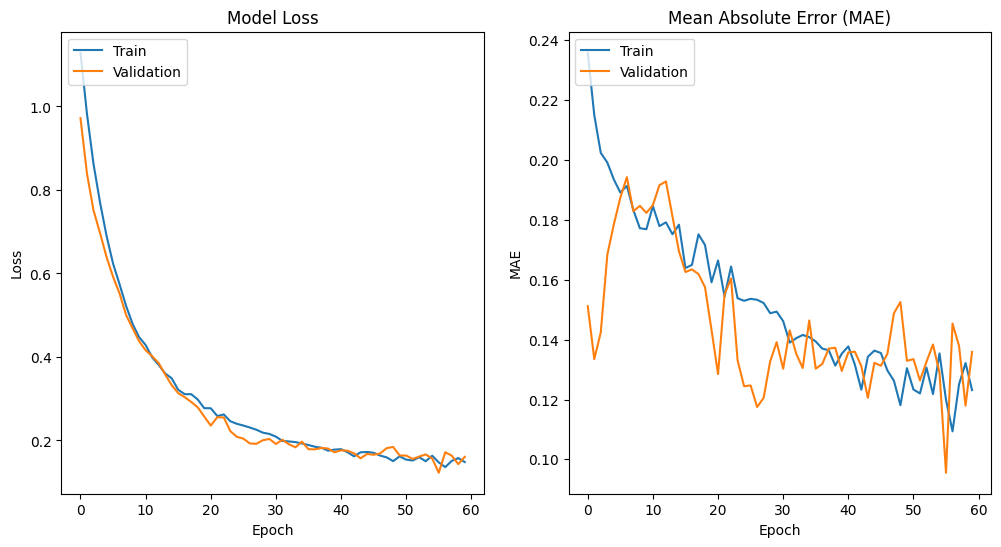

In [18]:
history = HSPC_predictor.train_model(HSPC_predictor.absorbance_features,HSPC_predictor.target_df,epochs=60,learning_rate=0.001)
HSPC_predictor.plot_training_perfomance(history)

visualize the performance of each preprocessing step

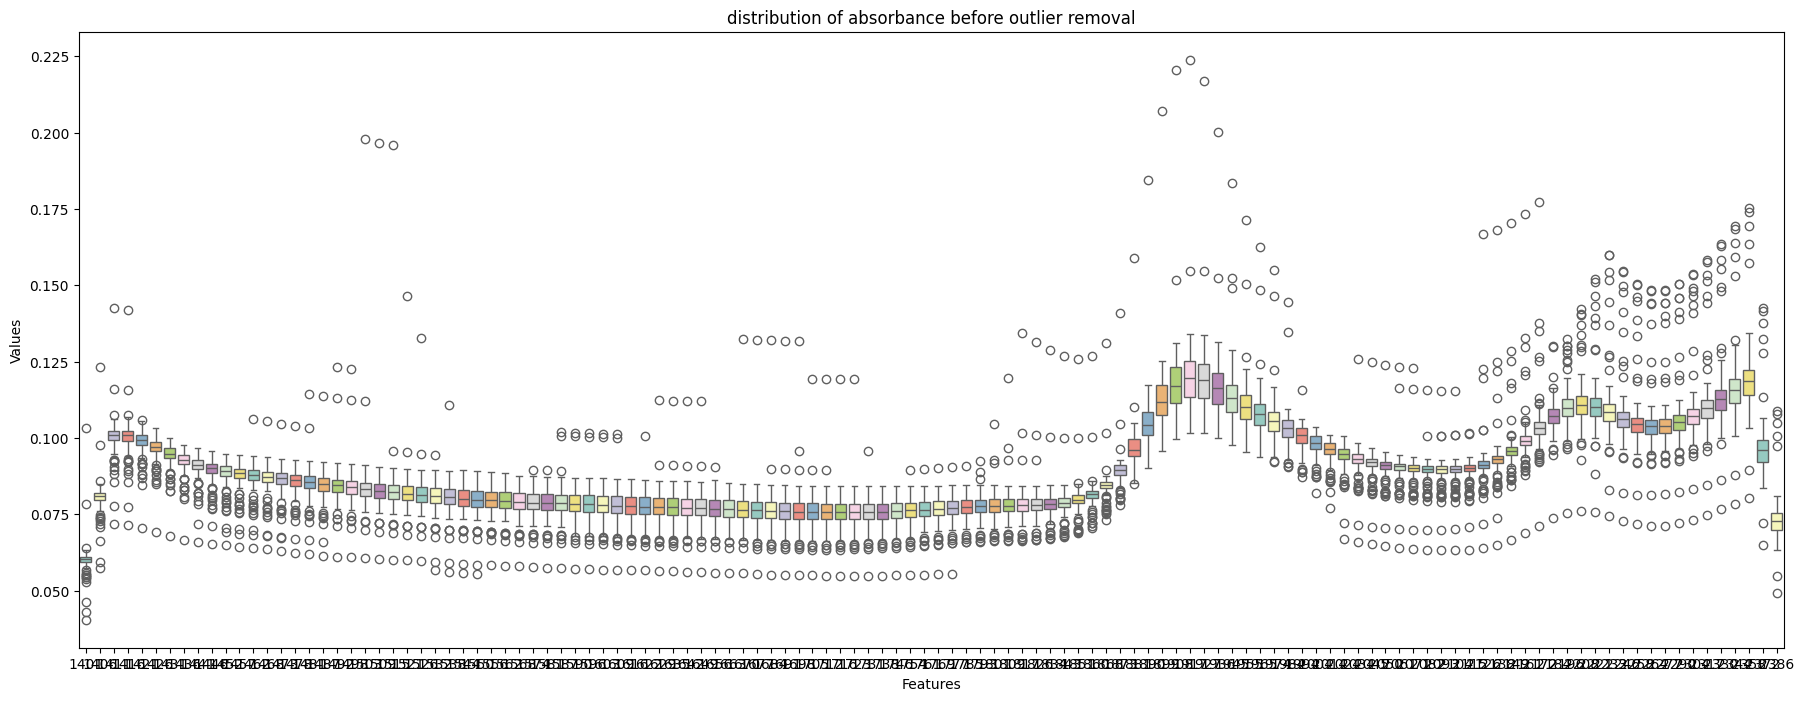

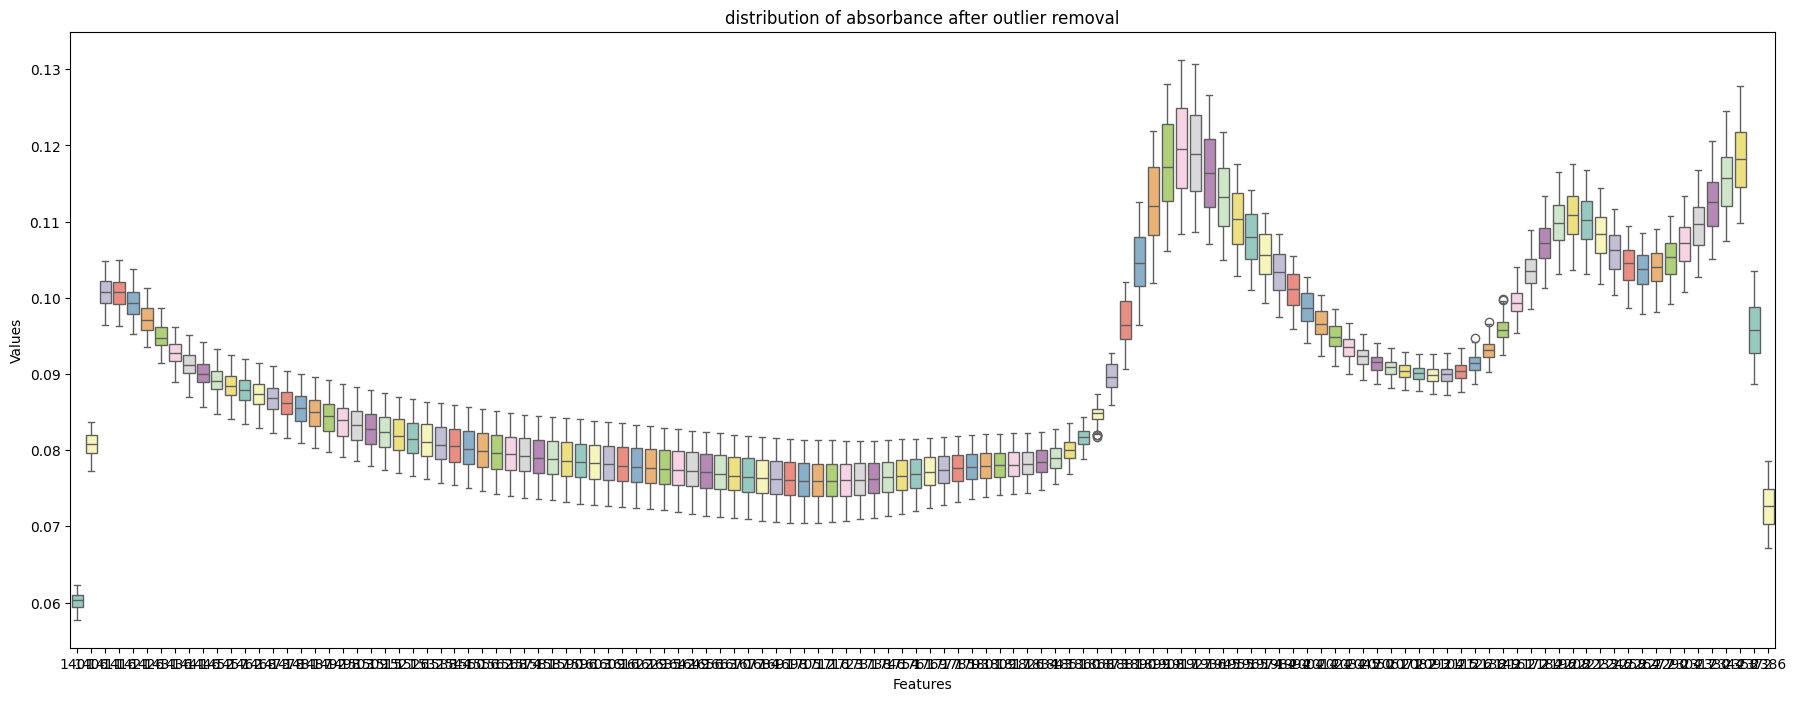

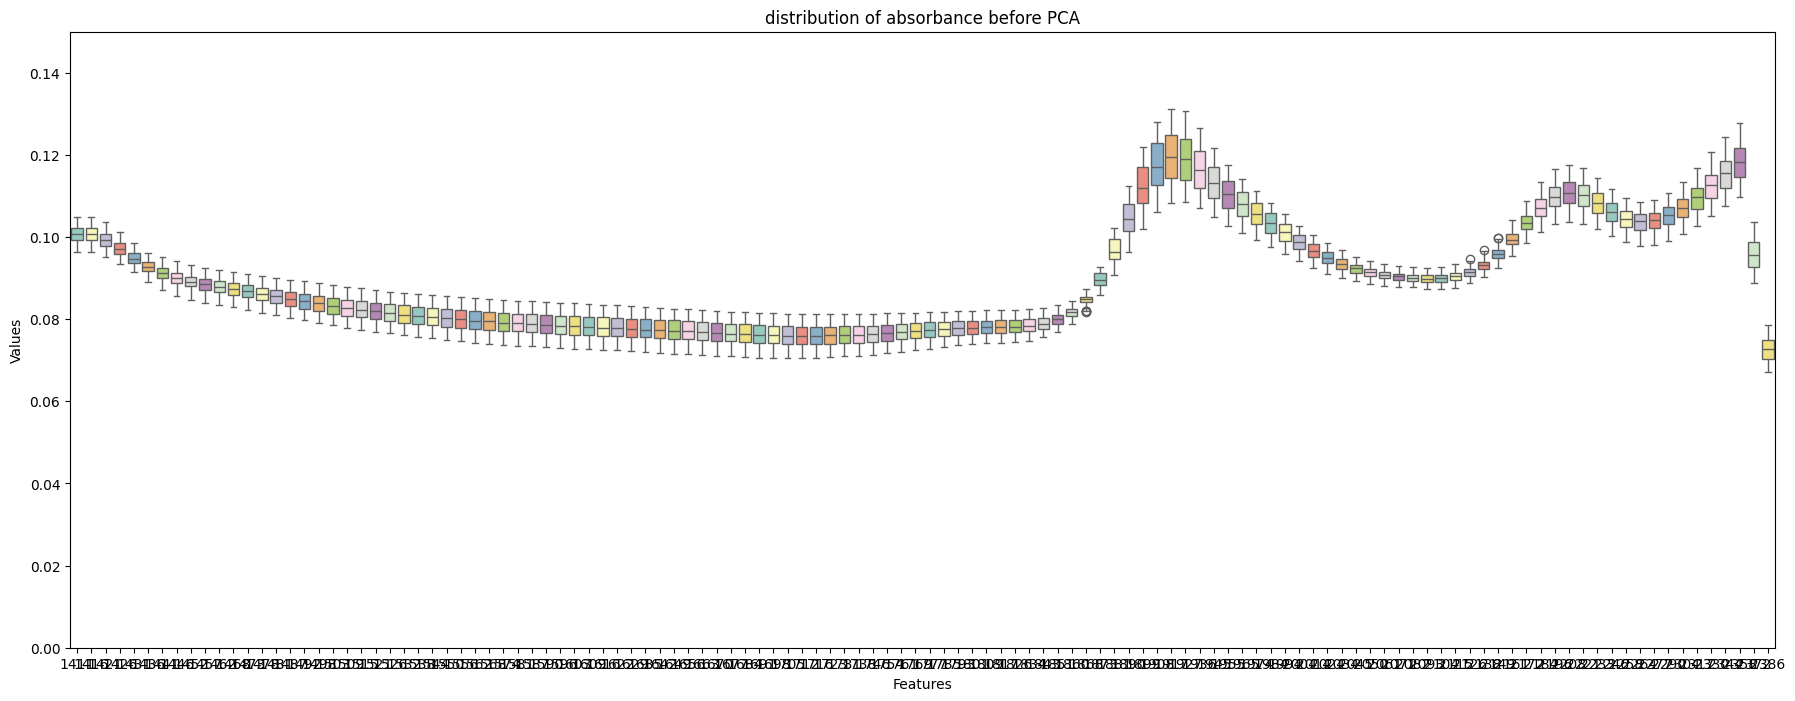

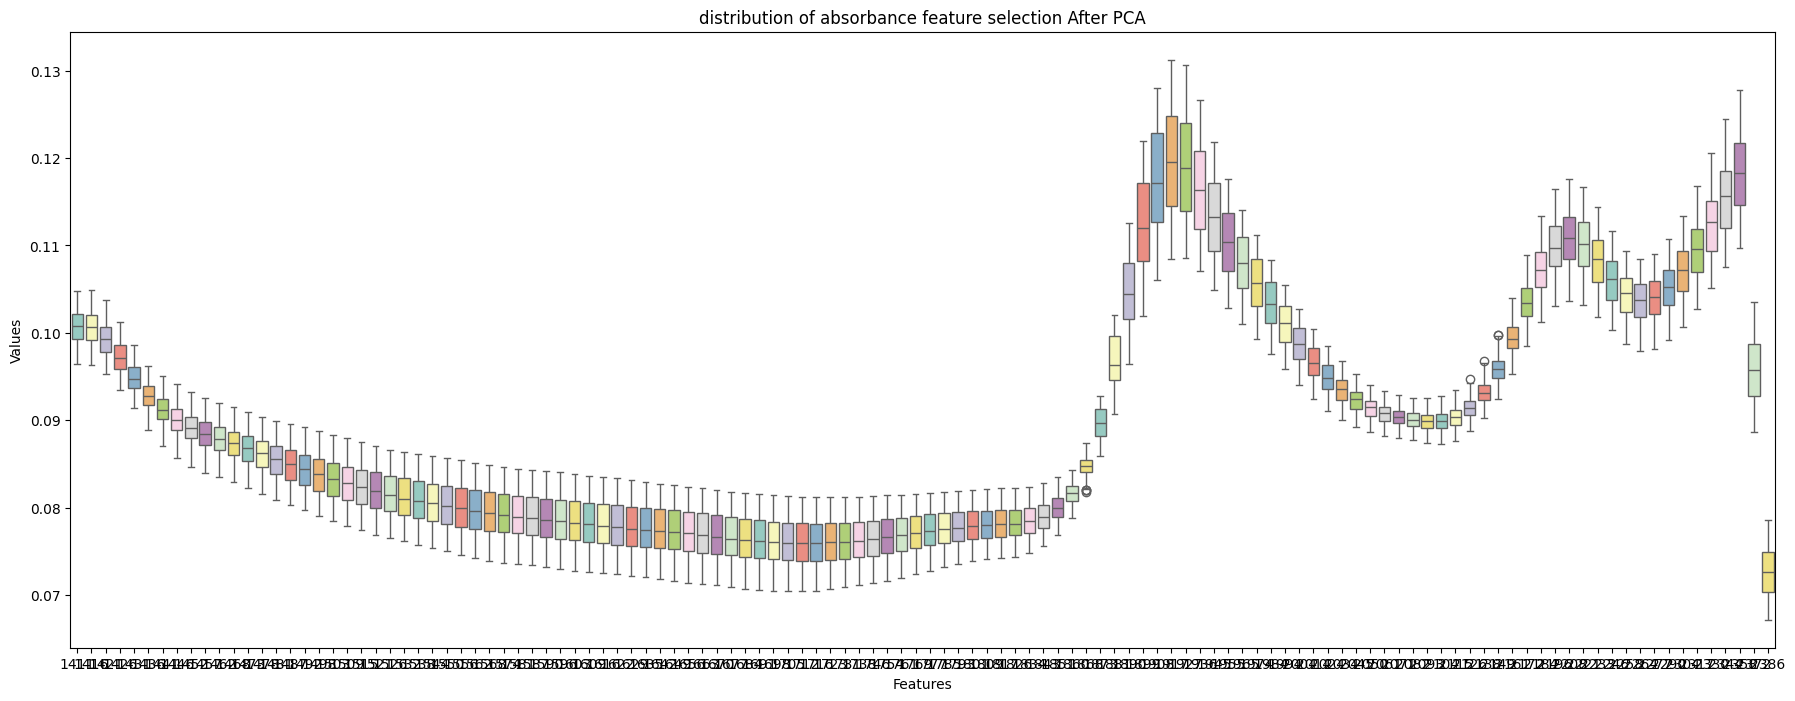

outlier_samples are
       Sample ID  ScanIndex
0   TSTSMPL13-A          1
1   TSTSMPL13-A          2
2   TSTSMPL13-A          3
3   TSTSMPL13-A          4
4   TSTSMPL13-A          5
..          ...        ...
8   TSTSMPL37-A          9
3   TSTSMPL37-B          4
6   TSTSMPL37-B          7
9   TSTSMPL37-B         10
7   TSTSMPL38-A          8

[116 rows x 2 columns]
dimension of features are reduced to 64 componnents
absorbance dataset create consisting of 354 observations and 66 features
outlier_samples are
       Sample ID  ScanIndex
0   TSTSMPL11-B          1
4   TSTSMPL11-B          5
0   TSTSMPL13-A          1
1   TSTSMPL13-A          2
2   TSTSMPL13-A          3
..          ...        ...
1   TSTSMPL37-B          2
3   TSTSMPL37-B          4
6   TSTSMPL37-B          7
7   TSTSMPL37-B          8
9   TSTSMPL37-B         10

[113 rows x 2 columns]
dimension of features are reduced to 64 componnents
absorbance dataset create consisting of 357 observations and 66 features


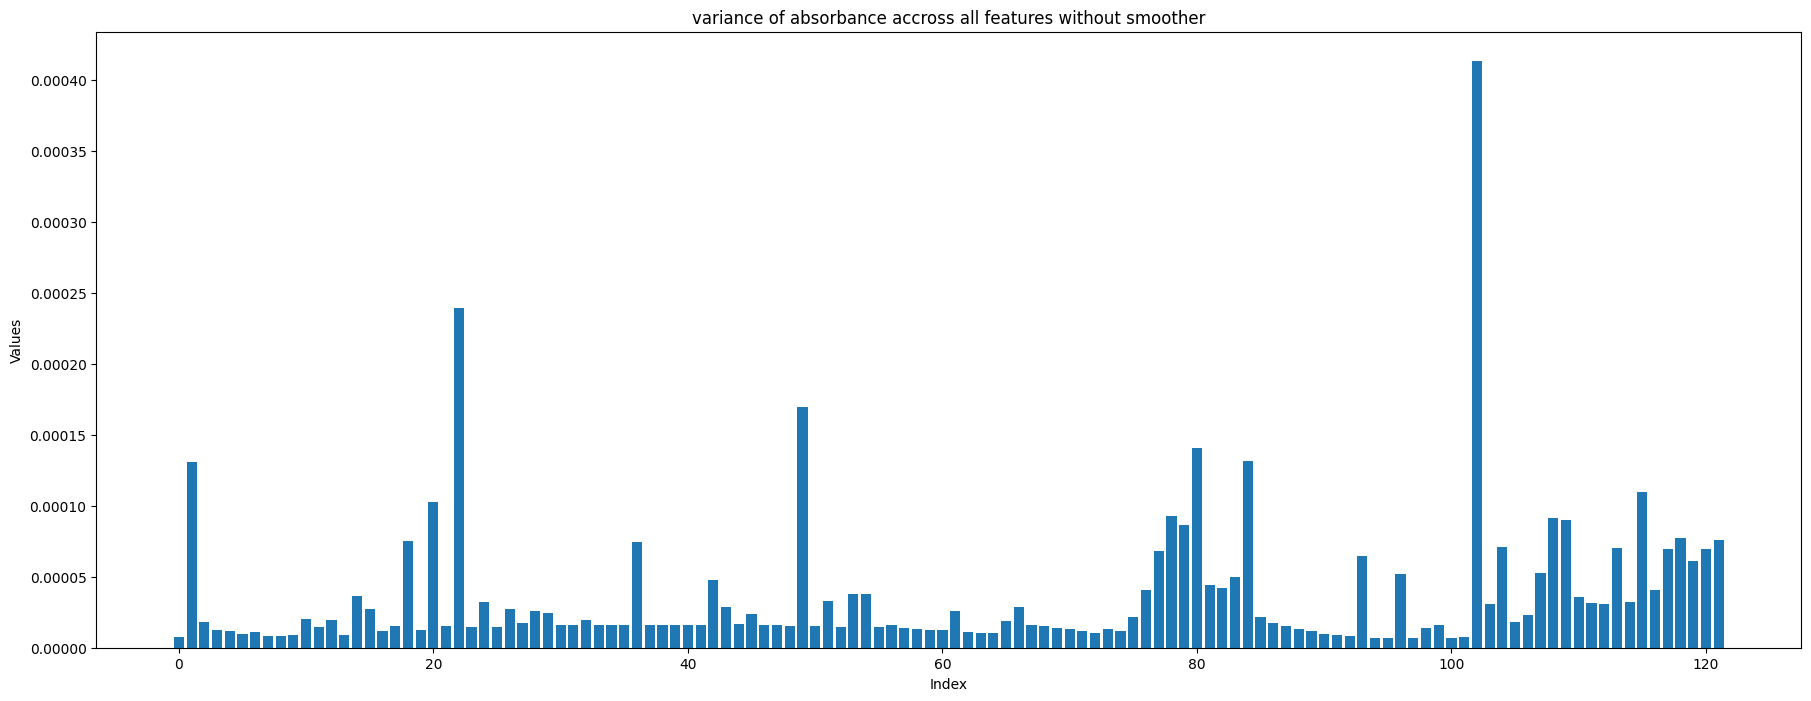

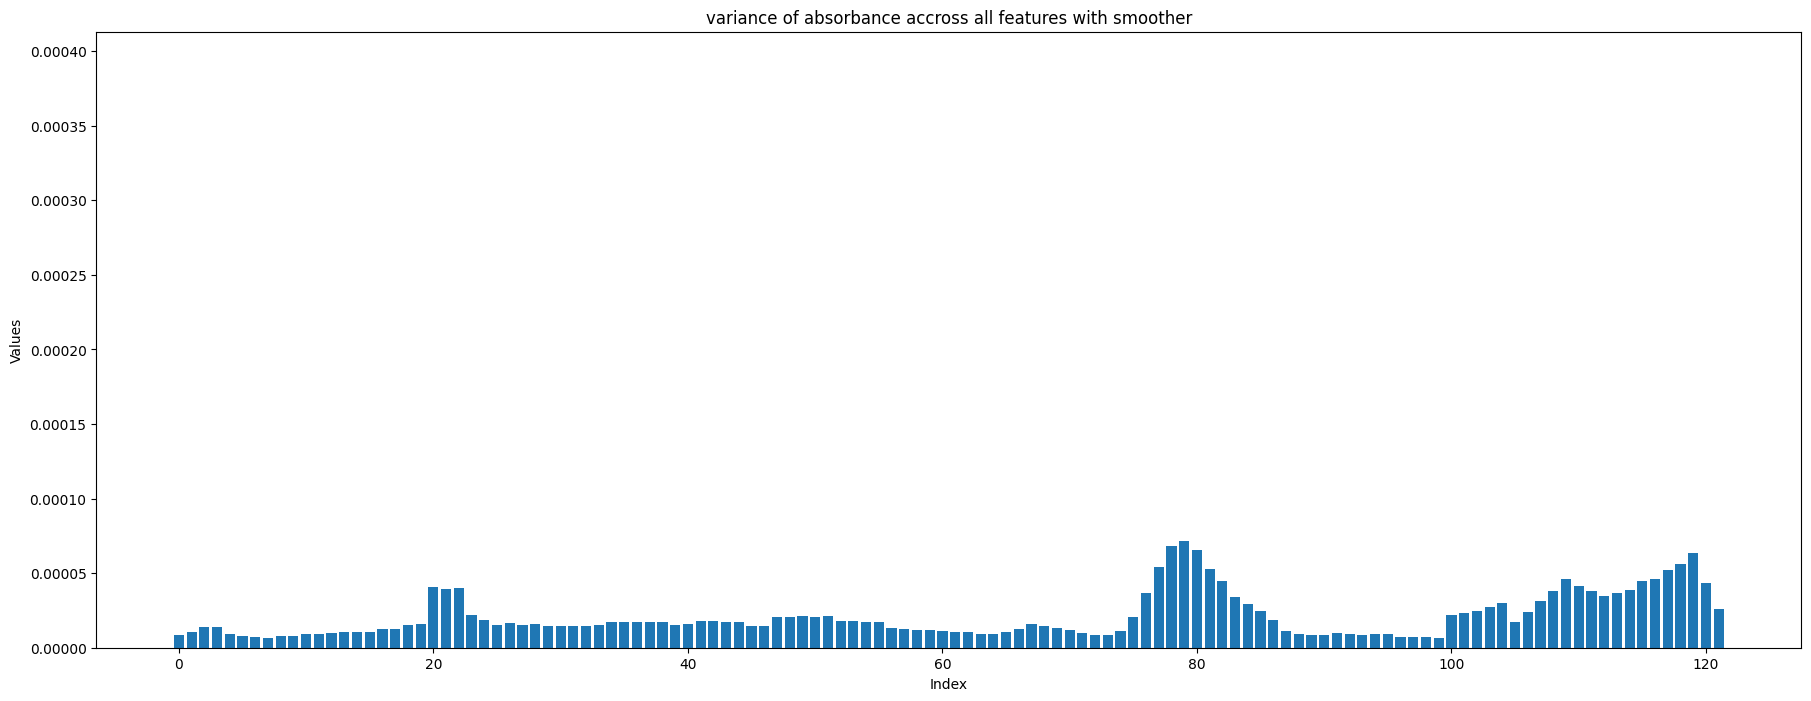

In [14]:
HSPC_predictor.vizualize_outlier_removal_perfromance()
HSPC_predictor.vizualize_pca_perfromance()
HSPC_predictor.vizualize_smoother_performance()

test the model with the data using the validation data

In [20]:
id = 3
test_sample = HSPC_predictor.absorbance_features[id,:]
result = HSPC_predictor.predict(test_sample)
print(f'ground truth {HSPC_predictor.target[id]} vs predicted value:{result[0,0]}')

1/1 [==============================] - 0s 36ms/step
ground truth 0.67 vs predicted value:0.6457792520523071
